### 宿題2: 以下の積分をモンテカルロシミュレーションで解いてみましょう
\begin{equation*}
  \int_0^1 2x^3 dx
\end{equation*}

ヒント
 1.  積分の意味としては、曲線の下の面積を計算してください、という意味です。
 2. グラフを見ると、当然x軸（横軸）は0~1の範囲ですが、縦軸の範囲は0から2です。
 3. その範囲で乱数を発生させて、発生させた乱数のうち、いくつの点が線の下になるかの割合を求めます。乱数の発生のさせ方は、generate_uniform_random関数を使いましょう。

### 回答（松本 敬史）

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  #matplotlibはグラフ描画のためのライブラリ

In [2]:
#sizeはサンプル数、upperは乱数を発生させるエリアのx軸とy軸の上限（下限は(0,0))
def generate_uniform_random(size=10, upper=[3,3]):
    result = np.zeros((size, len(upper)))
    for i in range(len(upper)):
        result[:, i] = np.random.rand(size) * upper[i]
    return result

In [3]:
def in_circle_func(x, y):
    if x**2 + y**2 <=3**2:
        return 1
    else:
        return 0

In [4]:
def in_ellipse_func(x, y):
    if (x**2)/(3**2) + (y**2)/(4**2) <=50:
        return 1
    else:
        return 0

In [5]:
def in_integral_func(x, y):
    if y <= 2*x**3:
        return 1
    else:
        return 0

In [6]:
def get_incircle_ratio(res, in_circle_data, out_circle_data):
    in_circle_count = 0
#    in_circle_data = []
#    out_circle_data = []

    for each_row in res:
        x = each_row[0]
        y = each_row[1]
#        in_circle_flag = in_circle_func(x=x, y=y)  #もし円の中であれば1, そうでなければ0
#        in_circle_flag = in_ellipse_func(x=x, y=y)  #もし楕円の中であれば1, そうでなければ0
        in_circle_flag = in_integral_func(x=x, y=y)  #もし積分の中であれば1, そうでなければ0
        in_circle_count += in_circle_flag #足し上げていけば円の中に入る点の数を数えられる
    
        #あとで色分けした散布図を書くためにデータを分けておく
        if in_circle_flag==1:
            in_circle_data.append(each_row)
        else:
            out_circle_data.append(each_row)

    in_circle_ratio = in_circle_count/len(res)
    return in_circle_ratio

In [14]:
in_circle_data = []
out_circle_data = []
estimated_area = []
sample_size = 10000

# 乱数を生成
rand_nums = generate_uniform_random(size=sample_size, upper=[1,2])

# 面積の計算
in_circle_ratio = get_incircle_ratio(rand_nums, in_circle_data, out_circle_data)
result = (1*2)*in_circle_ratio
    
#後で可視化するために結果をリストに保存
estimated_area.append(result)

print(rand_nums[:10])
print("積分の中に入る割合",  in_circle_ratio)
print("推定された値", estimated_area[-1])  #サンプルサイズが最大のときの推定された面積
print("答え", 0.5)

[[ 0.59660278  1.24838632]
 [ 0.20452467  1.06718993]
 [ 0.13340097  1.46482145]
 [ 0.05947157  1.11377809]
 [ 0.3820608   1.5253226 ]
 [ 0.59255632  1.81176657]
 [ 0.78521869  1.26846245]
 [ 0.65334265  1.42781671]
 [ 0.7626221   1.1253912 ]
 [ 0.04502598  1.75076201]]
積分の中に入る割合 0.2511
推定された値 0.5022
答え 0.5


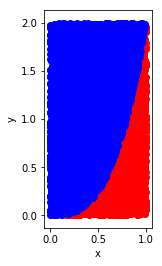

In [15]:
in_circle_data = np.array(in_circle_data)
out_circle_data = np.array(out_circle_data)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(in_circle_data[:,0], in_circle_data[:,1], c='red')
ax.scatter(out_circle_data[:,0], out_circle_data[:,1], c='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.gca().set_aspect('equal', adjustable='box')